In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [2]:
# загрузим датасет
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
# подготовим датасет
x_train = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255.
x_test = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
# убеждаемся, что наши данные похожи на правду

In [5]:
# размеры датасета
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000,)
y_test shape: (10000,)


0 	airplane
1 	automobile
2 	bird
3 	cat
4 	deer
5 	dog
6 	frog
7 	horse
8 	ship
9 	truck

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [8]:
from random import randint
from math import ceil

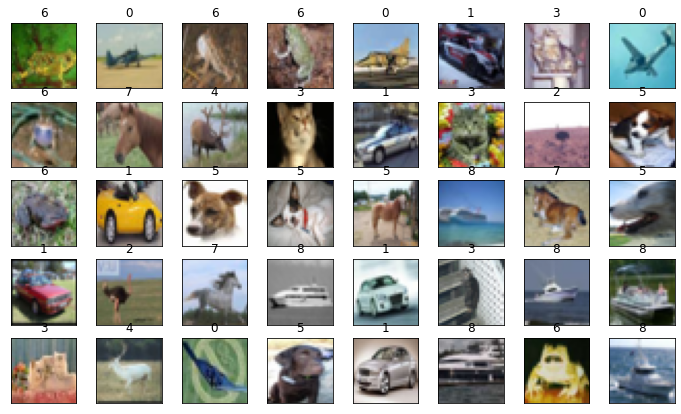

In [9]:
sample_cnt = 40
idx = sample_cnt
pos = 0
fig = plt.figure(figsize=(12, 7))
while idx:
  i = randint(0, x_train.shape[0])
  sample = x_train[i, ...]
  ax = fig.add_subplot(ceil(sample_cnt/8), 8, pos+1)
  ax.imshow(sample[:, :, :])
  plt.title(y_train[i])
  plt.xticks([]), plt.yticks([])
  pos += 1
  idx -= 1
plt.show()

0 airplane 1 automobile 2 bird 3 cat 4 deer 5 dog 6 frog 7 horse 8 ship 9 truck

Приступаем к обучению

In [10]:
NUM_EPOCHS = 100
BATCH_SIZE = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(buffer_size=x_train.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

In [11]:
class Model(tf.keras.Model):

  def __init__ (self):
    super(Model, self).__init__()

    self.conv1 = tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu')
    self.conv2 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
    self.conv3 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')
    self.conv4 = tf.keras.layers.Dropout(0.25)
    # self.conv4 = tf.keras.layers.Conv2D(512, (2, 2), padding='same', activation='relu')
    self.maxpool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2))
    self.fs1 = tf.keras.layers.Dense(128, activation='relu')
    self.fs2 = tf.keras.layers.Dense(10, activation='softmax')
    self.flatten = tf.keras.layers.Flatten()

  def call(self, inp):

    out = self.conv1(inp)
    out = self.maxpool(out)
    out = self.conv2(out)
    out = self.maxpool(out)
    out = self.conv3(out)
    out = self.maxpool(out)
    out = self.conv4(out)
    out = self.flatten(out)
    out = self.fs1(out)
    out = self.fs2(out)

    return out

model = Model()

In [12]:
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils


In [13]:
class Model(tf.keras.Model):

  def __init__ (self):
    super(Model, self).__init__()

    self.l1 = tf.keras.layers.Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same')
    self.l2 = tf.keras.layers.Dropout(0.10)
    self.l3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')
    self.l4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.l5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')
    self.l6 = tf.keras.layers.Dropout(0.15)
    self.l7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')
    self.l8 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.l9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')
    self.l10 = tf.keras.layers.Dropout(0.15)
    self.l11 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')
    self.l12 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.l13 = tf.keras.layers.Flatten()
    self.l14 = tf.keras.layers.Dropout(0)
    self.l15 = tf.keras.layers.Dense(1024, activation='relu', kernel_constraint=maxnorm(3))
    self.l16 = tf.keras.layers.Dropout(0.15)
    self.l17 = tf.keras.layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3))
    self.l18 = tf.keras.layers.Dropout(0.05)
    self.l19 = tf.keras.layers.Dense(10, activation='softmax')


  def call(self, inp):

    out = self.l1(inp)
    out = self.l2(out)
    out = self.l3(out)
    out = self.l4(out)
    out = self.l5(out)
    out = self.l6(out)
    out = self.l7(out)
    out = self.l8(out)
    out = self.l9(out)
    out = self.l10(out)
    out = self.l11(out)
    out = self.l12(out)
    out = self.l13(out)
    out = self.l14(out)
    out = self.l15(out)
    out = self.l16(out)
    out = self.l17(out)
    out = self.l18(out)
    out = self.l19(out)
    

    return out

model = Model()


In [14]:
def loss(logits, labels):
  return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
      logits=logits, labels=labels
  ))


def accuracy(logits, labels):
  predictions = tf.argmax(logits, axis=1, output_type=tf.int32)
  return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), dtype=tf.float32))

In [15]:
LEARNING_RATE = 0.0001

lrate = LEARNING_RATE
decay = lrate/NUM_EPOCHS

# optimizer = SGD(lr=lrate, decay=decay, nesterov=False)
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
# optimizer = tf.keras.optimizers.RMSprop(LEARNING_RATE)

writer = tf.summary.create_file_writer('logs/adam')
# writer = tf.summary.create_file_writer('logs/rmsprop')

In [16]:
%%time

for iteration, (images, labels) in enumerate(train_ds):

  with tf.GradientTape() as tape:
    logits = model(images)
    loss_value = loss(logits, labels)


  grads = tape.gradient(loss_value, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))


  if iteration % 200 == 0:
    test_logits = model(x_test[:256, ...])
    accuracy_value = accuracy(test_logits, y_test[:256, ...])

    print(f'{iteration}  Accuracy: {accuracy_value.numpy()*100:.2f}')

    with writer.as_default():
      tf.summary.scalar('accuracy', accuracy_value, iteration)
      tf.summary.scalar('loss', loss_value, iteration)

0  Accuracy: 8.98
200  Accuracy: 25.00
400  Accuracy: 36.33
600  Accuracy: 36.72
800  Accuracy: 38.67
1000  Accuracy: 40.23
1200  Accuracy: 39.06
1400  Accuracy: 40.23
1600  Accuracy: 42.58
1800  Accuracy: 41.80
2000  Accuracy: 42.97
2200  Accuracy: 37.11
2400  Accuracy: 48.05
2600  Accuracy: 43.36
2800  Accuracy: 43.75
3000  Accuracy: 48.05
3200  Accuracy: 46.09
3400  Accuracy: 43.36
3600  Accuracy: 46.09
3800  Accuracy: 46.88
4000  Accuracy: 48.44
4200  Accuracy: 50.39
4400  Accuracy: 46.88
4600  Accuracy: 50.00
4800  Accuracy: 54.30
5000  Accuracy: 53.52
5200  Accuracy: 51.17
5400  Accuracy: 48.44
5600  Accuracy: 51.56
5800  Accuracy: 50.78
6000  Accuracy: 51.95
6200  Accuracy: 52.34
6400  Accuracy: 53.12
6600  Accuracy: 55.47
6800  Accuracy: 57.42
7000  Accuracy: 54.30
7200  Accuracy: 58.20
7400  Accuracy: 58.59
7600  Accuracy: 57.42
7800  Accuracy: 59.38
8000  Accuracy: 59.38
8200  Accuracy: 51.95
8400  Accuracy: 55.86
8600  Accuracy: 60.94
8800  Accuracy: 61.33
9000  Accuracy: 58

In [17]:
%%time

test_logits = model(x_test)
accuracy_value = accuracy(test_logits, y_test).numpy()
print(f'Final accuracy:  {accuracy_value*100:.2f}')

Final accuracy:  74.70
CPU times: user 3.48 s, sys: 187 ms, total: 3.67 s
Wall time: 3.68 s


In [18]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 205), started 2:15:29 ago. (Use '!kill 205' to kill it.)

<IPython.core.display.Javascript object>

In [19]:
def test_item(sample):

  logits = model(sample[None, ...])[0] 
  prediction = tf.nn.softmax(logits)
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12, 4))
  ax = fig.add_subplot(1,2,1)
  ax.imshow(sample[:, :, 0], cmap='gray')
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1, 2, 2)
  bar_list = ax.bar(np.arange(10), prediction, align='center')
  bar_list[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)
  plt.show()
  
  print(f'predicted: {ans}')

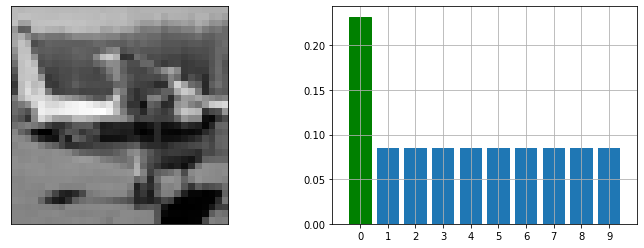

predicted: 0
True Answer: 0


In [20]:
idx = randint(0, x_test.shape[0])
sample = x_test[idx, ...]
test_item(sample)

print(f'True Answer: {y_test[idx]}')